In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Import data
import os;

#Akriti's directory
'''os.chdir('C:\\Users\\Akriti Goenka\\OneDrive - OPTIMAL STRATEGIX GROUP INC\\ADIB\\Card Performance & Demographics')'''
#Geerthi's directory
'''os.chdir('C:\\Users\\Geerthi Mahendran\\ADIB\\Card Performance & Demographics')'''
#Anuja's directory
os.chdir('C:\\Work\\ADIB\\Card Performance & Demographics\\')

jan_2017 = pd.read_sas('card201701.sas7bdat') #df1
feb_2017 = pd.read_sas('card201702.sas7bdat') #df2
mar_2017 = pd.read_sas('card201703.sas7bdat') #df3
apr_2017 = pd.read_sas('card201704.sas7bdat') #df4
may_2017 = pd.read_sas('card201705.sas7bdat') #df5
jun_2017 = pd.read_sas('card201706.sas7bdat') #df6
jul_2017 = pd.read_sas('card201707.sas7bdat') #df7
aug_2017 = pd.read_sas('card201708.sas7bdat') #df8
sep_2017 = pd.read_sas('card201709.sas7bdat') #df9
oct_2017 = pd.read_sas('card201710.sas7bdat') #df10
nov_2017 = pd.read_sas('card201711.sas7bdat') #df11
dec_2017 = pd.read_sas('card201712.sas7bdat') #df12
jan_2018 = pd.read_sas('card201801.sas7bdat') #df13
feb_2018 = pd.read_sas('card201802.sas7bdat') #df14

In [3]:
#Combining
frames = [jan_2017, feb_2017, mar_2017, apr_2017, may_2017, jun_2017, jul_2017, aug_2017, sep_2017, oct_2017, nov_2017, dec_2017, jan_2018, feb_2018]

In [4]:
for i in frames:
    for j in i.columns.values:
        if i[j].dtype == 'O':
            i[j] = i[j].str.decode("utf-8")

In [4]:
#Decoding
""""for x in frames:
    dataframe_name = x
    dataframe_name['Nationality'] = dataframe_name['Nationality'].str.decode("utf-8")
    dataframe_name['Emirates'] = dataframe_name['Emirates'].str.decode("utf-8")
    dataframe_name['CardType'] = dataframe_name['CardType'].str.decode("utf-8")
    dataframe_name['Gender'] = dataframe_name['Gender'].str.decode("utf-8")
    dataframe_name['IncomeBand'] = dataframe_name['IncomeBand'].str.decode("utf-8")
    dataframe_name['Segment'] = dataframe_name['Segment'].str.decode("utf-8")
    dataframe_name['DSUBranch'] = dataframe_name['DSUBranch'].str.decode("utf-8")
    dataframe_name['Marital_status'] = dataframe_name['Marital_status'].str.decode("utf-8")
    dataframe_name['StGeneral'] = dataframe_name['StGeneral'].str.decode("utf-8")
    dataframe_name['ProductBand'] = dataframe_name['ProductBand'].str.decode("utf-8")
    dataframe_name['ProductDescription'] = dataframe_name['ProductDescription'].str.decode("utf-8")
    dataframe_name['Liability'] = dataframe_name['Liability'].str.decode("utf-8")
    dataframe_name['PF'] = dataframe_name['PF'].str.decode("utf-8")
    dataframe_name['HF'] = dataframe_name['HF'].str.decode("utf-8")
    dataframe_name['AF'] = dataframe_name['AF'].str.decode("utf-8")
    dataframe_name['ActivationFlag'] = dataframe_name['ActivationFlag'].str.decode("utf-8")
    dataframe_name['Cycle'] = dataframe_name['Cycle'].str.decode("utf-8")""""

In [5]:
#Data Cleaning
data = feb_2018[feb_2018['Gender'].isin(['M', 'F'])]
data = data[data['Nationality'].isin(['India. Republic of','United Arab Emirates','Pakistan. Islamic Republic of','Jordan. Hashemite Kingdom of','Egypt. Arab Republic of','Philippines. Republic of the','Syrian Arab Republic','Palestinian Territory. Occupied','Sudan. Republic of','Lebanon. Lebanese Republic'])]
data = data[data['Marital_status'].isin(['Married','Unmarried','Divorced','Widowed'])]
data = data[data['Emirates'].isin(['ABU DHABI','DUBAI','SHARJAH','UMM AL QUWAIN', 'AJMAN', 'FUJAIRAH', 'RAS AL KHAIMAH'])]

In [6]:
#Converting to dummies
cat_vars=['Nationality', 'Emirates', 'CardType', 'Gender', 'IncomeBand',
       'Segment', 'DSUBranch', 'Marital_status','StGeneral', 'ProductBand',
       'ProductDescription', 'ActivationFlag', 'Cycle','Liability',
       'PF', 'HF', 'AF']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

In [7]:
#Keeping only dummies and removing the categorical variables
cat_vars=['Nationality', 'Emirates', 'CardType', 'Gender', 'IncomeBand',
       'Segment', 'DSUBranch', 'Marital_status','StGeneral', 'ProductBand',
       'ProductDescription', 'ActivationFlag', 'Cycle','Liability',
       'PF', 'HF', 'AF']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [8]:
#Data after creation of dummies
X_Data=data[to_keep]

In [9]:
#Defining X and y
y = X_Data['RevlFlag']
X = X_Data.drop(['RevlFlag','MISdate','Profit','SerialNo'],axis=1)

In [10]:
#Converting string to numeric
X=X.apply(pd.to_numeric,errors='coerce')
y=y.apply(pd.to_numeric,errors='coerce')  
X = X.fillna(0)

In [11]:
#RFE - Recursive Feature Elemination
def RFE(X,y,n):
    from sklearn import datasets
    from sklearn.feature_selection import RFE
    from sklearn.linear_model import LogisticRegression
    logreg = LogisticRegression()
    rfe = RFE(logreg, n)
    rfe = rfe.fit(X, y )
    print('rfe.support_')
    coeff = np.array([(X.columns.values),(rfe.support_)])
    coeff = pd.DataFrame(coeff.transpose(),columns=("Variables","support"))
    print(coeff)
    print('rfe.ranking_') 
    coeff = np.array([(X.columns.values),(rfe.ranking_)])
    coeff = pd.DataFrame(coeff.transpose(),columns=("Variables","ranking"))
    coeff=coeff.sort_values(by=['ranking'])
    print(coeff)
    return coeff.iloc[:n]

In [12]:
results=RFE(X,y,10)

rfe.support_
                                       Variables support
0                                        Vintage   False
1                              CreditShieldValue   False
2                                            Age    True
3                                       BuiltBal    True
4                                     InstallBal    True
5                                            ENR    True
6                                        ZeroAmt    True
7                                         Climit   False
8                                         DDFlag   False
9                                        Payment   False
10                                       Product    True
11                                    LCashSpend    True
12                                  LRetailSpend    True
13                               ForignCashSpend   False
14                             ForignRetailSpend    True
15                                      TotSpend    True
16                

In [13]:
#Getting the selected variables
cols = results['Variables'].tolist()
cols

['LRetailSpend',
 'Age',
 'BuiltBal',
 'InstallBal',
 'ENR',
 'ZeroAmt',
 'TotSpend',
 'Product',
 'LCashSpend',
 'ForignRetailSpend']

In [14]:
#Defining X 
X=X_Data[cols]
y=X_Data['RevlFlag']

###### Logistic Regression 

In [15]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
    
X_train=X_train.fillna(0)
X_test=X_test.fillna(0)
y_train=y_train.fillna(0)
y_test=y_test.fillna(0)
   

In [16]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
#Test Model
predictions = logmodel.predict(X_test)

In [18]:
#Validation
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.82      0.97      0.89     22683
        1.0       0.85      0.44      0.58      8941

avg / total       0.82      0.82      0.80     31624

[[21963   720]
 [ 4977  3964]]


### Logit statmodel

In [50]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


         Current function value: 0.451705
         Iterations: 35


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


AttributeError: module 'scipy.stats' has no attribute 'chisqprob'

###### Decision Tree

In [45]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=20, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')

In [46]:
#Getting features
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X_Data[cols])
features

['LRetailSpend',
 'Age',
 'BuiltBal',
 'InstallBal',
 'ENR',
 'ZeroAmt',
 'TotSpend',
 'Product',
 'LCashSpend',
 'ForignRetailSpend']

In [47]:
#Test Model
predictions = dtree.predict(X_test)

In [48]:
#Validation
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print("Train Accuracy :: ", accuracy_score(y_train, dtree.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(y_test, predictions))


             precision    recall  f1-score   support

        0.0       0.73      1.00      0.84     22683
        1.0       0.82      0.05      0.09      8941

avg / total       0.75      0.73      0.63     31624

[[22591    92]
 [ 8534   407]]
Train Accuracy ::  0.7267042445036485
Test Accuracy  ::  0.7272324816594992


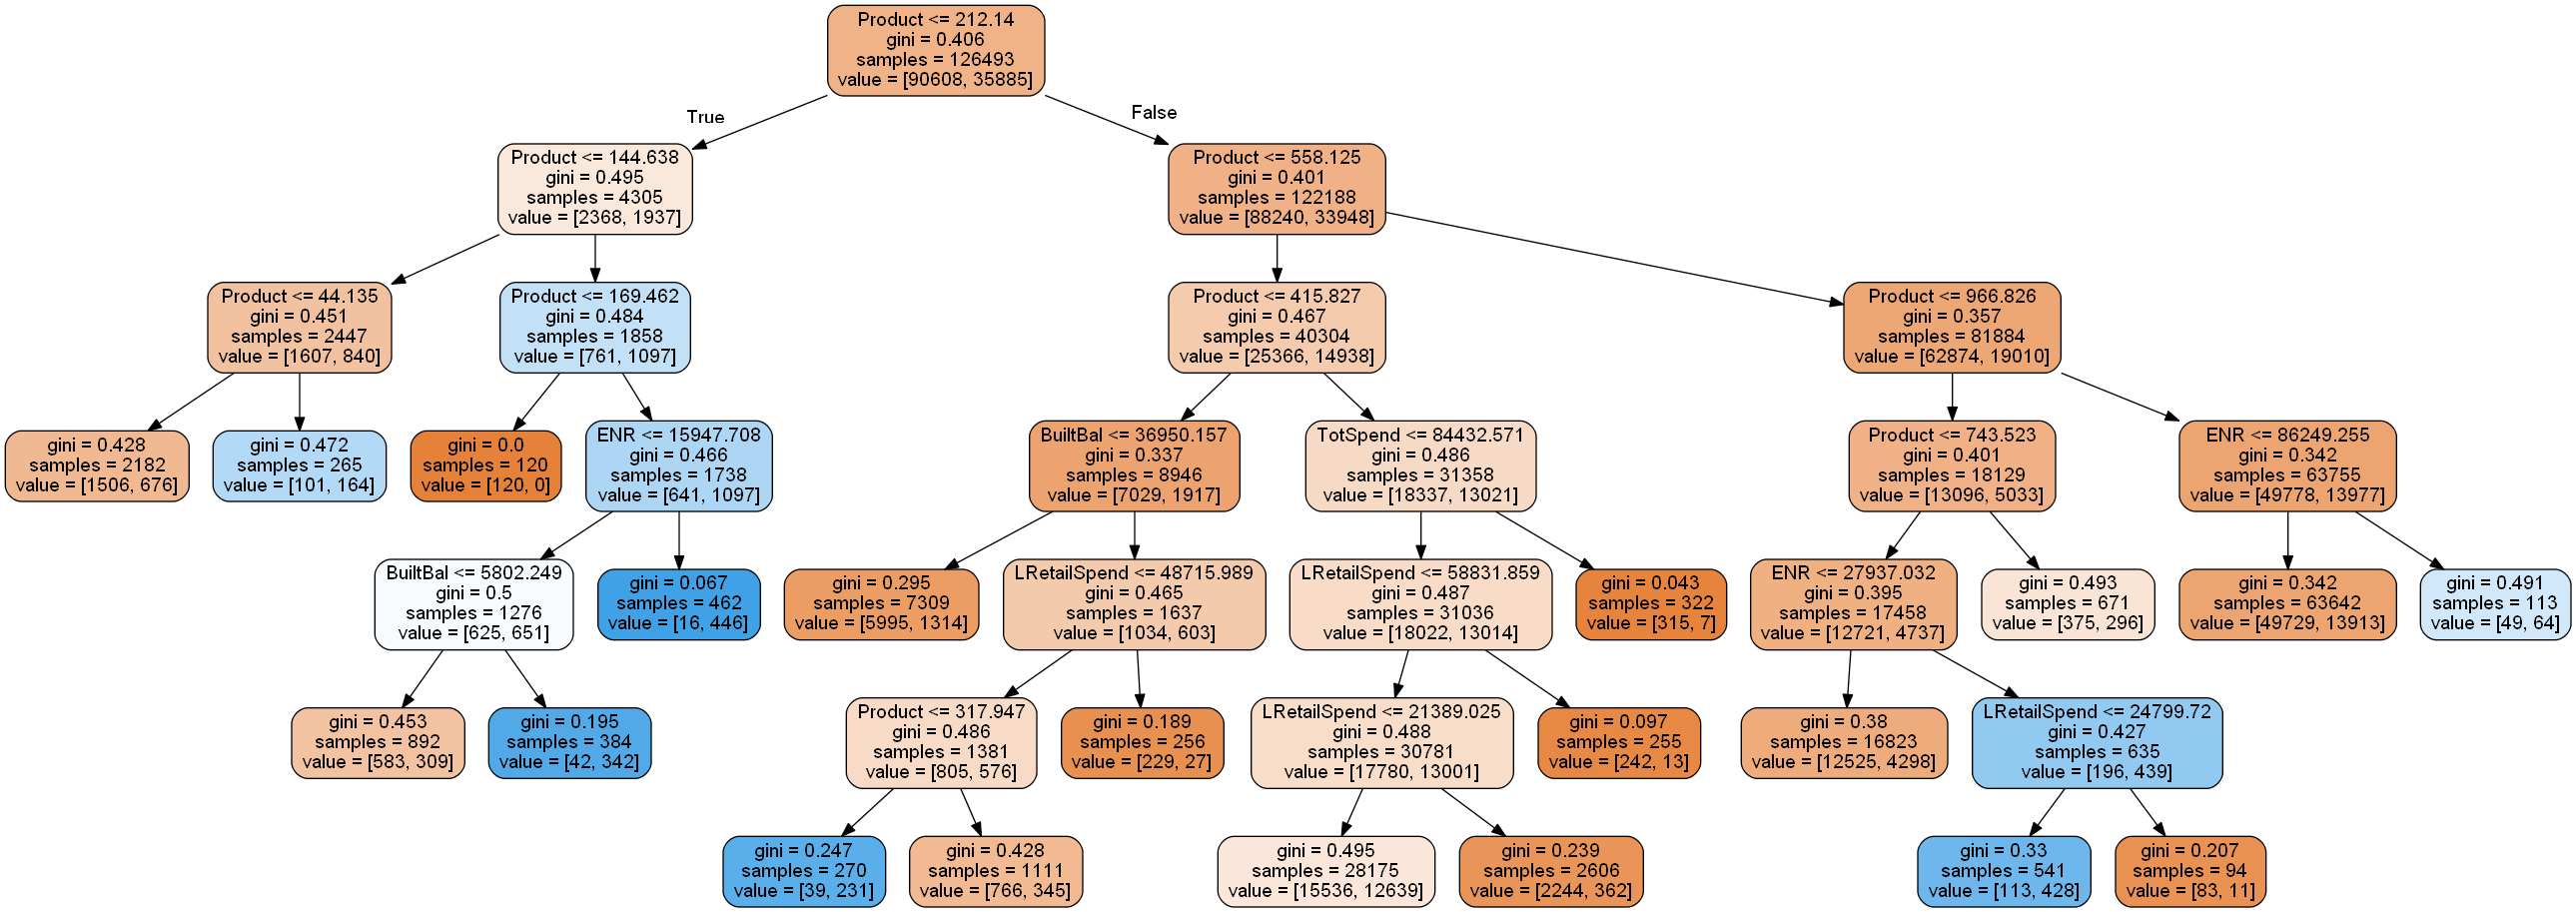

In [49]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

###### Random Forest Classifier

In [24]:
#Random Forest
def Random_Forest_Classifier(X,y):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
    clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(X,y)
    print(clf)
    predictions = clf.predict(X_test)
    print("Train Accuracy :: ", accuracy_score(y_train, clf.predict(X_train)))
    print("Test Accuracy  :: ", accuracy_score(y_test, predictions))
    print(" Confusion matrix: \n ", confusion_matrix(y_test, predictions))
    print(" Classification Report: \n ", classification_report(y_test, predictions))

In [25]:
X=X.fillna(0)
y=y.fillna(0)
Random_Forest_Classifier(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
Train Accuracy ::  0.7934352098535097
Test Accuracy  ::  0.7944915254237288
 Confusion matrix: 
  [[22410   273]
 [ 6226  2715]]
 Classification Report: 
               precision    recall  f1-score   support

        0.0       0.78      0.99      0.87     22683
        1.0       0.91      0.30      0.46      8941

avg / total       0.82      0.79      0.76     31624



###### Support Vector Machines

In [64]:
#SVM
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [65]:
#Test Model
predictions = svc_model.predict(X_test)

In [66]:
#Validation
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.72      1.00      0.84     22683
        1.0       0.00      0.00      0.00      8941

avg / total       0.51      0.72      0.60     31624

[[22683     0]
 [ 8941     0]]


C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
'''def RidgeRegression(X,y):
    X_train, y_train, X_test, y_test=Train_Test_Split(X,y)
    #ridge regression
    from sklearn.linear_model import Ridge
    from sklearn.metrics import r2_score
    reg = Ridge (alpha = .5)
    y_pred_ridge = reg.fit(X_train, y_train).predict(X_test)
    r2_score_ridge = r2_score(y_test, y_pred_ridge)
    print(reg,"\n")
    print("r^2 on test data : %f" % r2_score_ridge,"\n")
    print("Intercept: ",reg.intercept_,"\n")
    print("Coefficients")
    coeff = np.array([(X_train.columns.values),(reg.coef_)])
    coeff = pd.DataFrame(coeff.transpose(),columns=("Variables","Coeff"))
    coeff=coeff.sort_values(by=['Coeff'])
    print(coeff)
    #print(reg.summary())'''

In [18]:
#RidgeRegression(X,y)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) 

r^2 on test data : 0.426275 

Intercept:  0.34737198786507334 

Coefficients
                   Variables        Coeff
2                       PF_N    -0.165806
3                Liability_Y   -0.0812169
9                       AF_N   -0.0755144
8           DSUBranch_BRANCH   -0.0625811
7                   Gender_M   -0.0520321
0             StGeneral_NORM  0.000440315
4                     Profit  0.000727273
1                       HF_N    0.0574438
5  ActivationFlag_ActiveCard     0.108806
6              OVERDUECYCLES     0.163632


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import Imputer

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
#VIF for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=7.0, impute=True, impute_strategy='median'):
        # From looking at documentation, values between 5 and 10 are "okay".
        # Above 10 is too high and so should be removed.
        self.thresh = thresh
        
        # The statsmodel function will fail with NaN values, as such we have to impute them.
        # By default we impute using the median value.
        # This imputation could be taken out and added as part of an sklearn Pipeline.
        if impute:
            self.imputer = Imputer(strategy=impute_strategy)

    def fit(self, X, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'imputer'):
            self.imputer.fit(X)
        return self

    def transform(self, X, y=None):
        print('ReduceVIF transform')
        columns = X.columns.tolist()
        if hasattr(self, 'imputer'):
            X = pd.DataFrame(self.imputer.transform(X), columns=columns)
        return ReduceVIF.calculate_vif(X, self.thresh)
    def calculate_vif(X, thresh=7.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        dropped=True
        while dropped:
            # Loop repeatedly until we find that all columns within our dataset
            # have a VIF value we're happy with.
            variables = X.columns
            dropped=False
            vif = []
            new_vif = 0
            for var in X.columns:
                new_vif = variance_inflation_factor(X[variables].values, X.columns.get_loc(var))
                vif.append(new_vif)
                if np.isinf(new_vif):
                    break
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X

In [28]:
transformer = ReduceVIF()

In [ ]:
X = transformer.fit_transform(X[X.columns[:243]], y)

ReduceVIF fit
ReduceVIF transform


C:\Users\Anuja Mitra\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1386: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Anuja Mitra\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping BuiltBal with vif=inf
Dropping LCashSpend with vif=inf
Dropping Nationality_India. Republic of with vif=inf
Dropping Nationality_Lebanon. Lebanese Republic with vif=inf
Dropping Nationality_Sudan. Republic of with vif=inf
Dropping Nationality_United Arab Emirates with vif=inf
Dropping Emirates_ABU DHABI with vif=inf
Dropping CardType_Classic with vif=inf
Dropping CardType_Gold with vif=inf
Dropping CardType_Infinite with vif=inf
Dropping CardType_Signature with vif=inf
Dropping IncomeBand_10K - 14K  income with vif=inf
Dropping Gender_F with vif=inf
Dropping MISdate with vif=inf
Dropping Segment_Arab Expat with vif=inf
Dropping DSUBranch_BRANCH with vif=inf
Dropping Marital_status_Divorced with vif=inf
Dropping StGeneral_30DA with vif=inf
Dropping ProductBand_ADIB VISA PLATINUM with vif=inf
Dropping ProductBand_Booking.com INFINITE with vif=inf


###### Train Test Split

In [10]:
#Train test Split

def Train_Test_Split(X,y):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    X_train=X_train.fillna(0)
    X_test=X_test.fillna(0)
    y_train=y_train.fillna(0)
    y_test=y_test.fillna(0)
    return X_train, y_train, X_test, y_test